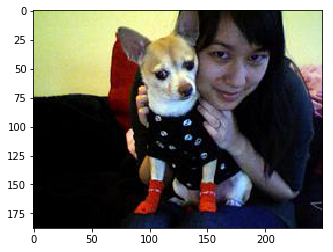

Digital type:  <dtype: 'float32'>


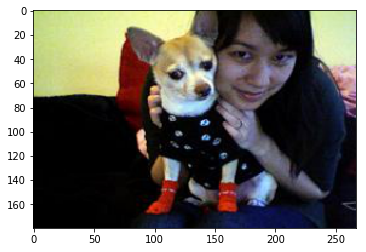

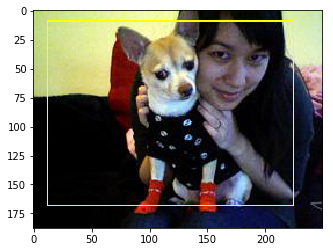

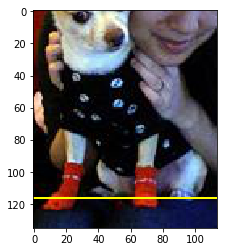

In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

image_raw_data = tf.gfile.FastGFile("../../../ImageNetDogs/n02085620-Chihuahua/n02085620_7.jpg", 'rb').read()

with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(img_data.eval())
    plt.show()

    resized = tf.image.resize_images(img_data, [180, 267], method=0)
    # TensorFlow的函数处理图片后存储的数据是float32格式的，需要转换成uint8才能正确打印图片。
    print("Digital type: ", resized.dtype)
    resized = np.asarray(resized.eval(), dtype='uint8')
    # tf.image.convert_image_dtype(rgb_image, tf.float32)
    plt.imshow(resized)
    plt.show()
    # draw_bounding_boxes函数要求图像矩阵中的数字为实数，所以先将图像矩阵转化为实数类型。
    # draw_bounding_boxes函数的输入是一个batch的数据，也就是多张图像组成的四维矩阵，
    # 所以需要将解码之后的图像矩阵加一维。
    batched = tf.expand_dims(tf.image.convert_image_dtype(img_data, tf.float32), 0)
    # ymin xmin ymax xmax
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.9], [0.1, 0.1, 0.9, 0.0]]])
    # 加入标注框对象
    result = tf.image.draw_bounding_boxes(batched, boxes)
    plt.figure(1)  
    plt.imshow(result[0].eval())
    
    img_data = result[0]
    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(img_data), bounding_boxes=boxes, min_object_covered=0.1)
    batched = tf.expand_dims(tf.image.convert_image_dtype(img_data, tf.float32), 0)
    image_with_box = tf.image.draw_bounding_boxes(batched, bbox_for_draw)
    distorted_image = tf.slice(img_data, begin, size)
    plt.figure(2)  
    plt.imshow(distorted_image.eval())
    plt.show()